**COVID19 CT Pneumonia Detection**
with Transfer Learning: An implementation in Tensorflow and Keras

In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7) #2

#seed for applying random image augmentation and shuffling the order of the image

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [37]:
print(os.listdir("D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source"))

['test', 'train']


In [38]:
from os import listdir
data_list = listdir('D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source/train')

data_list

['abnormal', 'normal']

Case 1: COVID vs Normal
Resnet50 Initialization

In [39]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import resnet50
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf


DATASET_PATH  = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source/train'
test_dir =  'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source/test'
IMAGE_SIZE    = (150, 150) 
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # No. of images to be yielded from the generator per batch (try reducing batch size or freeze more layers if your GPU runs out of memory)
NUM_EPOCHS    = 10 # The maximum number of times the program can iterate over the entire dataset in one train
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 #5e-4



#setup the respective training and validation preprocessing and batch image preparation 
#functions using the ImageDataGenerator class, specifying our class_mode parameter as “binary” for this case
#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                 
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  
                                                 
                                                  )



C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 10734 images belonging to 2 classes.
Found 2683 images belonging to 2 classes.


Layer Modification at upper layer of Resnet50

In [40]:
#Simple CNN model based on Resnet50


from keras import models
from keras import layers
from keras.applications.resnet50 import ResNet50
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))   #Rectified Linear Unit
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid activation function


model.compile(loss='binary_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

C:\Users\Admin\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [41]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 36,695,425
Trainable params: 13,107,713
Non-trainable params: 23,587,712
_________________________________________________________________
None


Training

In [42]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )



1074
269
Epoch 1/10


C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1073/1073 [==============================] - 1002s 934ms/step - loss: 0.4595 - acc: 0.8335 - val_loss: 0.6875 - val_acc: 0.4302
Epoch 2/10
1073/1073 [==============================] - 990s 922ms/step - loss: 0.3405 - acc: 0.8565 - val_loss: 0.7671 - val_acc: 0.4097
Epoch 3/10
1073/1073 [==============================] - 969s 903ms/step - loss: 0.3206 - acc: 0.8667 - val_loss: 0.7445 - val_acc: 0.4052
Epoch 4/10
1073/1073 [==============================] - 960s 894ms/step - loss: 0.3216 - acc: 0.8663 - val_loss: 0.8097 - val_acc: 0.4059
Epoch 5/10
1073/1073 [==============================] - 958s 893ms/step - loss: 0.3081 - acc: 0.8769 - val_loss: 0.9124 - val_acc: 0.4067
Epoch 6/10
1073/1073 [==============================] - 959s 894ms/step - loss: 0.3057 - acc: 0.8744 - val_loss: 0.7823 - val_acc: 0.4070
Epoch 7/10
1073/1073 [==============================] - 959s 894ms/step - loss: 0.3017 - acc: 0.8796 - val_loss: 0.7448 - val_acc: 0.4055
Epoch 8/10
1073/1073 [======================

Evaluation

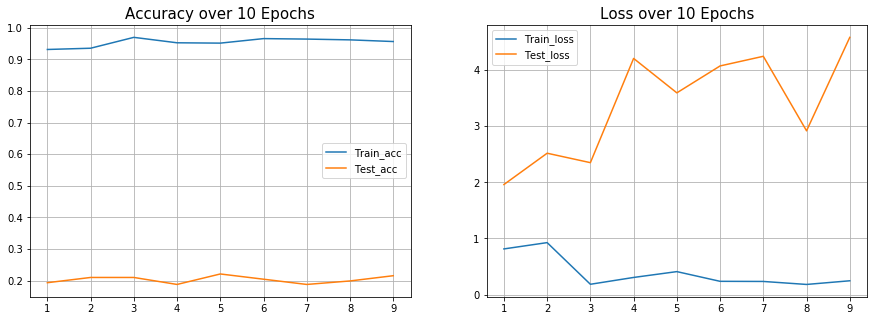

In [28]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

In [29]:
model.save('Covid_Binary_resnet50.h5')

In [30]:
#Dont forget shuffle false. Note that Shuffle False is necessary for predict generator due to Keras's internal shuffling.

test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,
        
        
        class_mode="binary")
eval_generator.reset()    



Found 104 images belonging to 2 classes.


In [31]:

eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])



11/11 [==============================] - 2s 139ms/step
Test loss: 0.003504855325445533
Test accuracy: 1.0


Predict

In [33]:
eval_generator.reset()  
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")






1000/1000 [==============================] - 111s 111ms/step
Predictions finished


covid\03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg


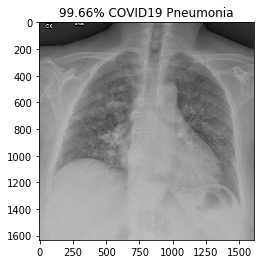

covid\2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg


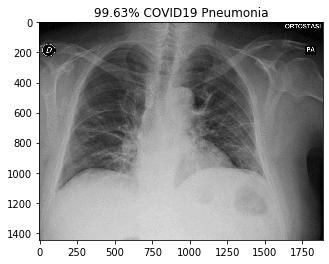

covid\44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg


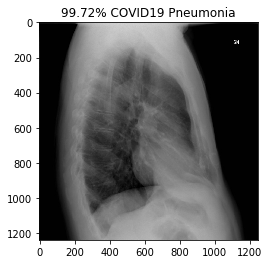

covid\6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg


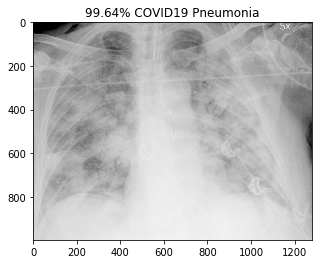

covid\7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg


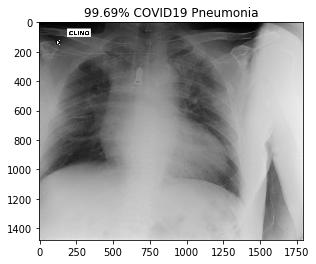

covid\9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg


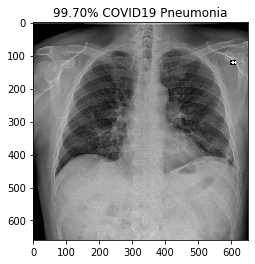

covid\COVID-00020.jpg


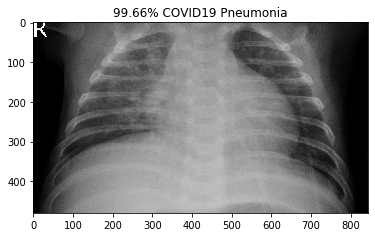

covid\COVID-00021.jpg


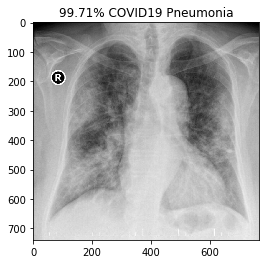

covid\COVID-00022.jpg


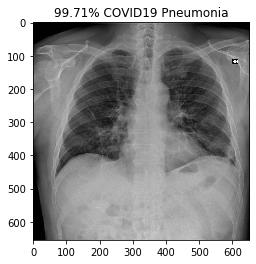

covid\COVID-00023.jpg


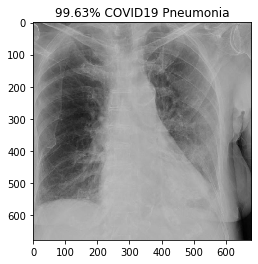

covid\COVID-00024.jpg


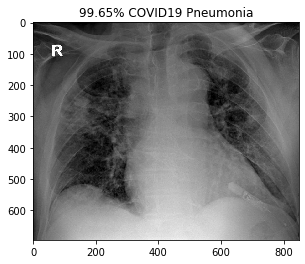

covid\COVID-00025.jpg


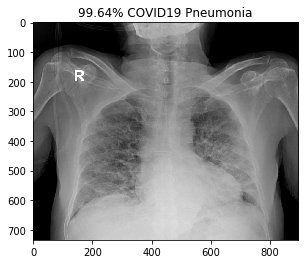

covid\COVID-00026.jpg


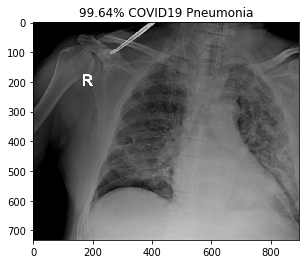

covid\COVID-00027.jpg


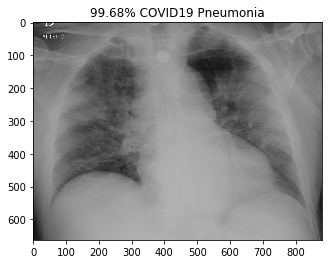

covid\COVID-00028.jpg


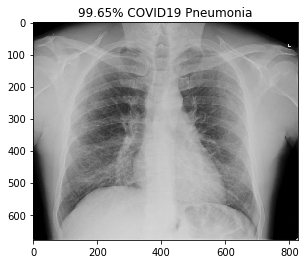

covid\COVID-00029.jpg


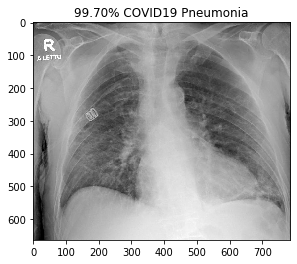

covid\COVID-00030.jpg


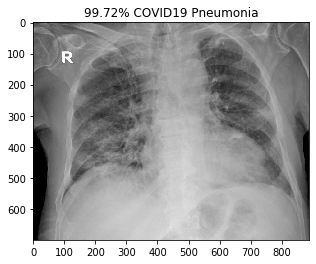

covid\COVID-00031.jpg


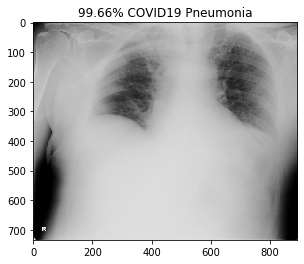

covid\COVID-00032.jpg


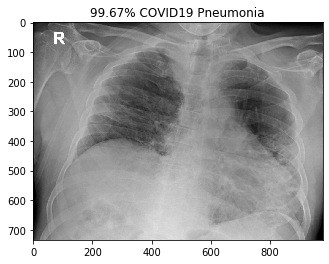

covid\COVID-00033.jpg


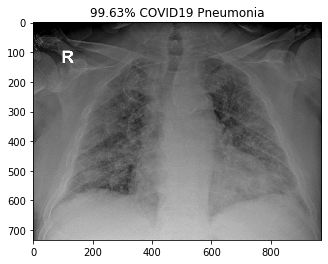

covid\COVID-00034.jpg


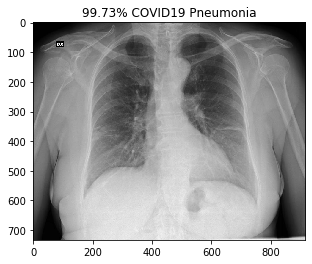

covid\COVID-00035.jpg


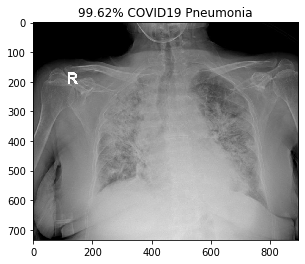

covid\COVID-00036.jpg


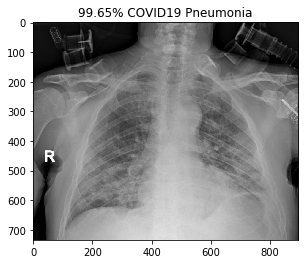

covid\COVID-00037.jpg


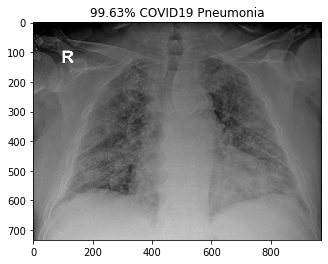

covid\COVID-00038.jpg


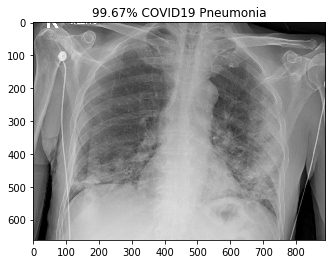

covid\D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg


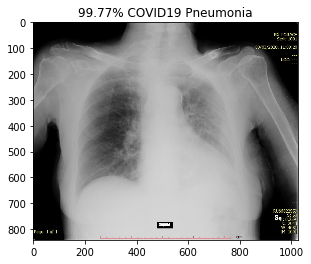

covid\E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg


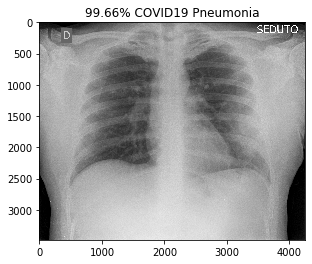

covid\auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg


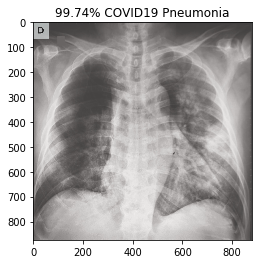

covid\ciaa199.pdf-001-a.png


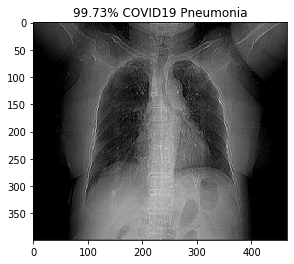

covid\covid-19-pneumonia-12.jpg


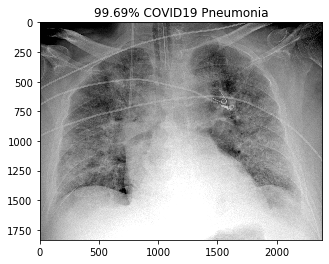

covid\covid-19-pneumonia-rapidly-progressive-12-hours.jpg


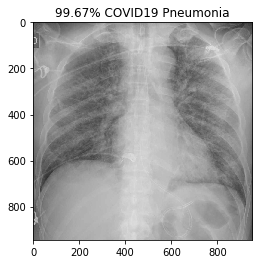

covid\covid-19-pneumonia-rapidly-progressive-admission.jpg


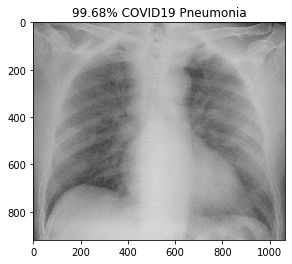

covid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg


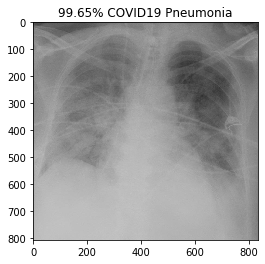

covid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-1.jpg


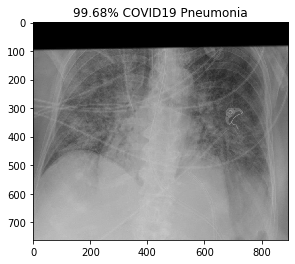

covid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-2.jpg


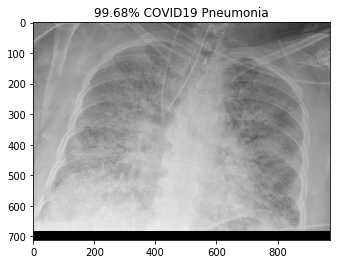

covid\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-3.jpg


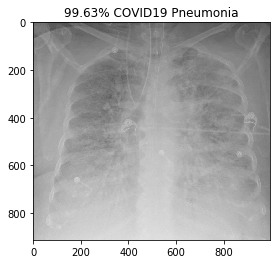

covid\figure1-5e71be566aa8714a04de3386-98-left.jpeg


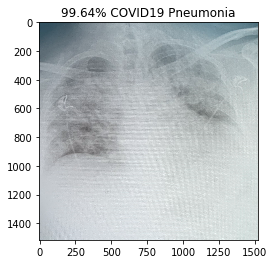

covid\gr1_lrg-b.jpg


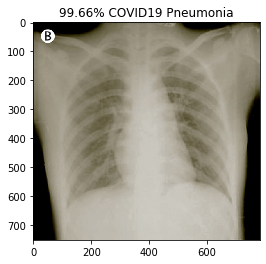

covid\kjr-21-e24-g001-l-a.jpg


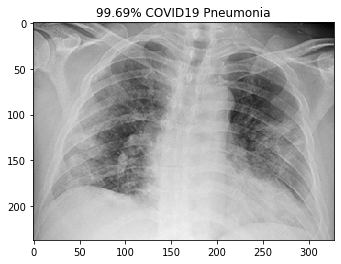

covid\kjr-21-e25-g001-l-a.jpg


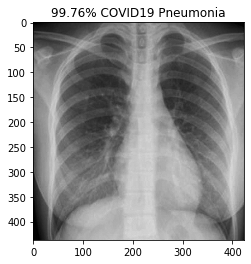

covid\nejmoa2001191_f3-PA.jpeg


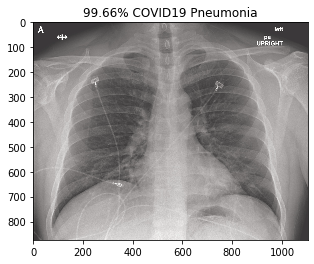

covid\nejmoa2001191_f4.jpeg


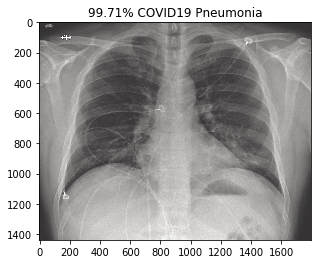

covid\nejmoa2001191_f5-L.jpeg


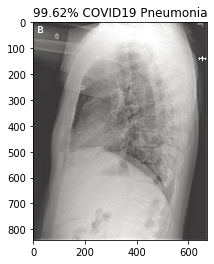

covid\nejmoa2001191_f5-PA.jpeg


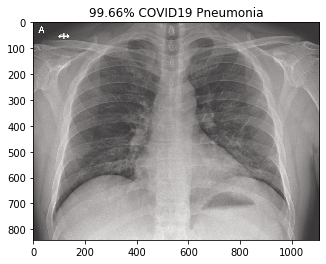

covid\radiol.2020200490.fig3.jpeg


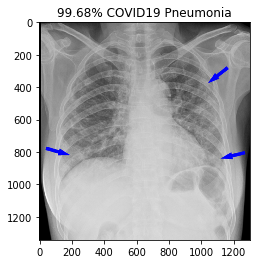

covid\ryct.2020200028.fig1a.jpeg


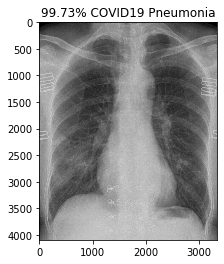

covid\ryct.2020200034.fig2.jpeg


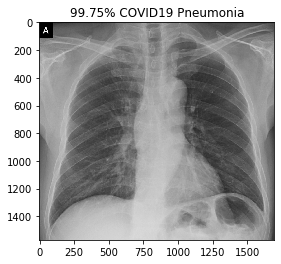

covid\ryct.2020200034.fig5-day0.jpeg


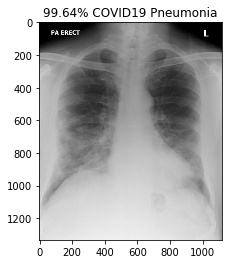

covid\ryct.2020200034.fig5-day4.jpeg


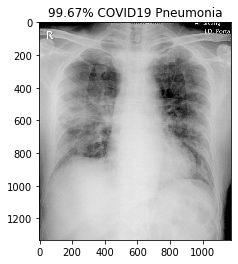

covid\ryct.2020200034.fig5-day7.jpeg


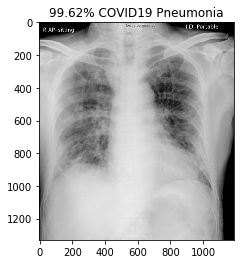

normal\NORMAL2-IM-0829-0001.jpeg


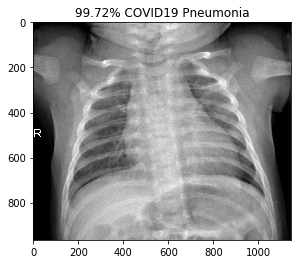

normal\NORMAL2-IM-0830-0001.jpeg


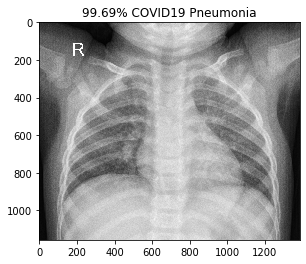

normal\NORMAL2-IM-0831-0001.jpeg


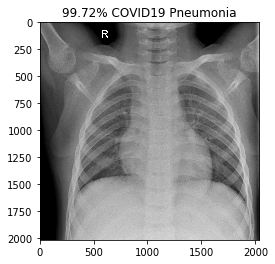

normal\NORMAL2-IM-0832-0001-0001.jpeg


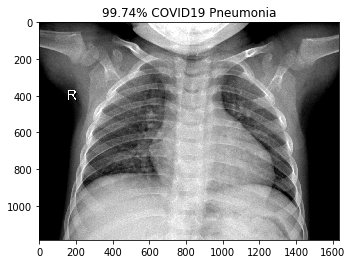

normal\NORMAL2-IM-0832-0001-0002.jpeg


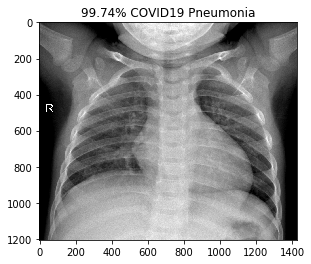

normal\NORMAL2-IM-0832-0001.jpeg


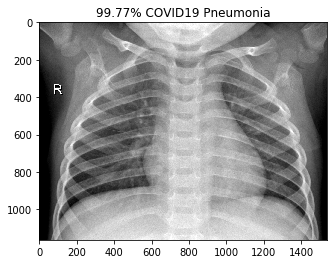

normal\NORMAL2-IM-0833-0001.jpeg


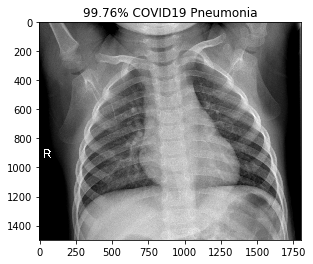

normal\NORMAL2-IM-0834-0001.jpeg


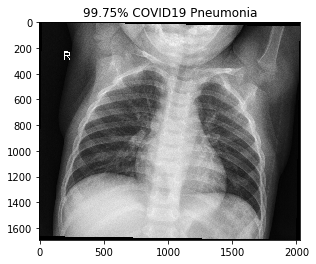

normal\NORMAL2-IM-0836-0001.jpeg


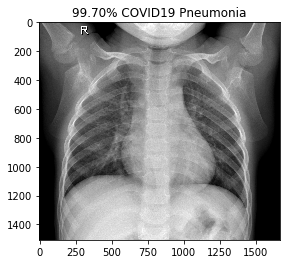

normal\NORMAL2-IM-0837-0001.jpeg


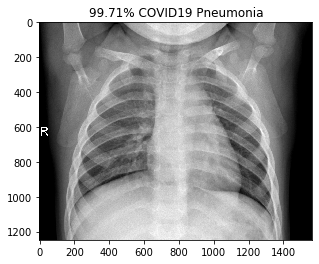

normal\NORMAL2-IM-0838-0001.jpeg


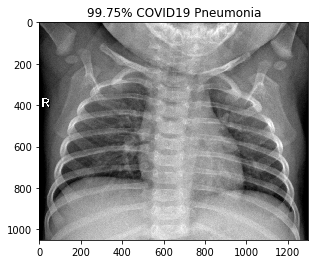

normal\NORMAL2-IM-0839-0001.jpeg


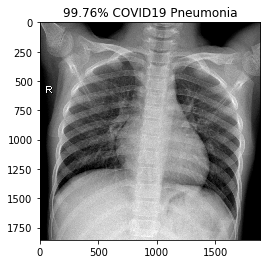

normal\NORMAL2-IM-0840-0001.jpeg


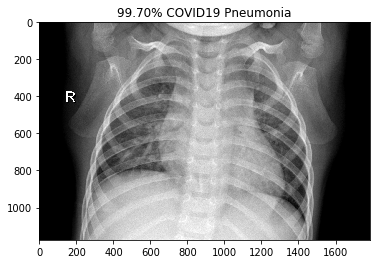

normal\NORMAL2-IM-0841-0001.jpeg


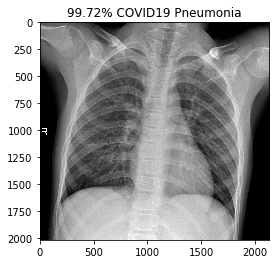

normal\NORMAL2-IM-0842-0001.jpeg


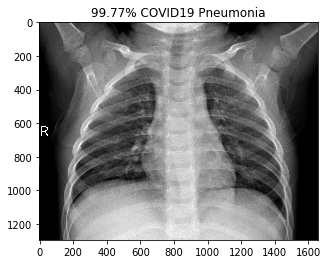

normal\NORMAL2-IM-1194-0001.jpeg


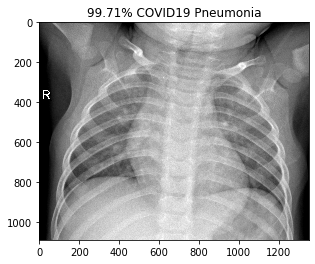

normal\NORMAL2-IM-1258-0001.jpeg


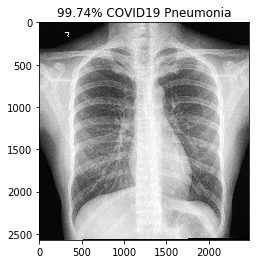

normal\NORMAL2-IM-1266-0001.jpeg


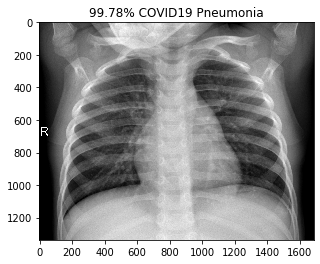

normal\NORMAL2-IM-1270-0001.jpeg


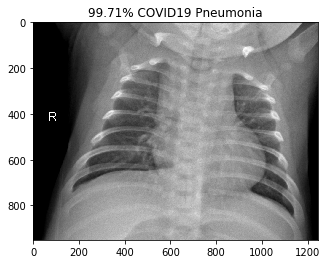

normal\NORMAL2-IM-1277-0001.jpeg


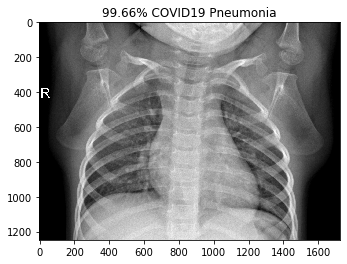

normal\NORMAL2-IM-1282-0001.jpeg


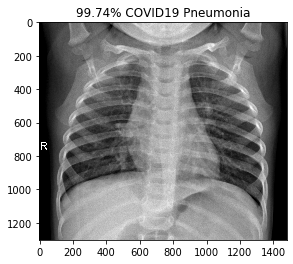

normal\NORMAL2-IM-1291-0001.jpeg


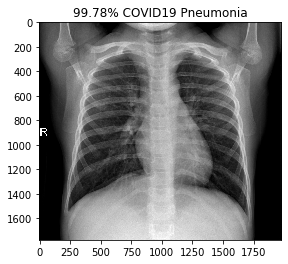

normal\NORMAL2-IM-1296-0001.jpeg


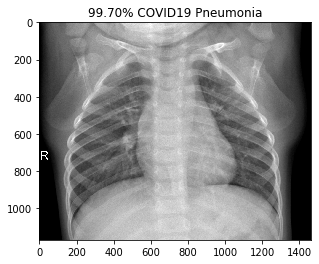

normal\NORMAL2-IM-1306-0001.jpeg


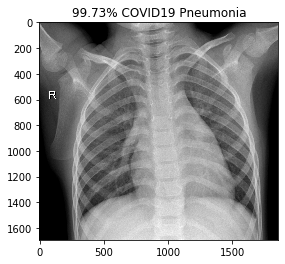

normal\NORMAL2-IM-1315-0001.jpeg


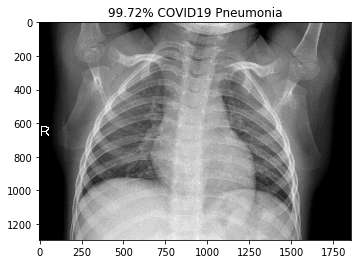

normal\NORMAL2-IM-1322-0001.jpeg


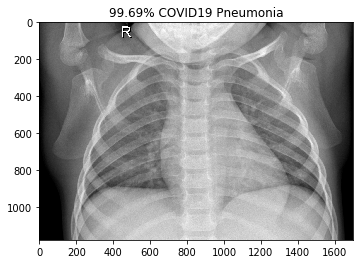

normal\NORMAL2-IM-1330-0001.jpeg


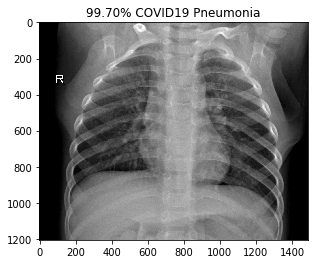

normal\NORMAL2-IM-1337-0001.jpeg


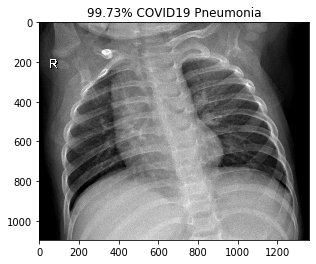

normal\NORMAL2-IM-1345-0001-0001.jpeg


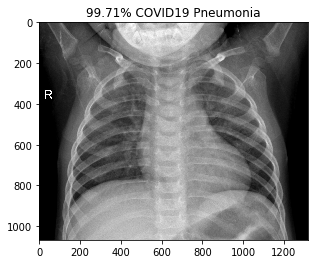

normal\NORMAL2-IM-1345-0001-0002.jpeg


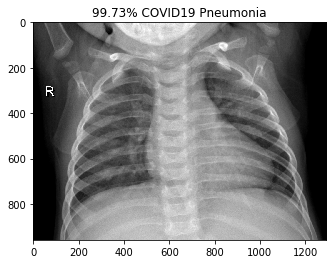

normal\NORMAL2-IM-1346-0001.jpeg


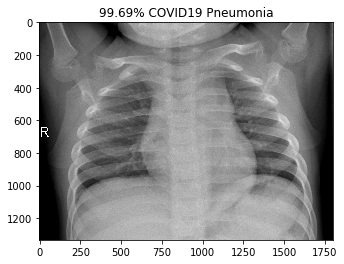

normal\NORMAL2-IM-1347-0001.jpeg


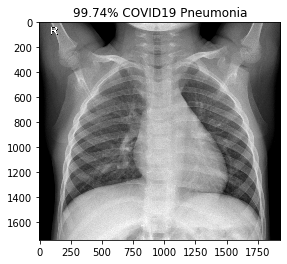

normal\NORMAL2-IM-1348-0001.jpeg


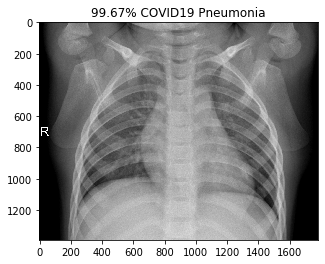

normal\NORMAL2-IM-1349-0001.jpeg


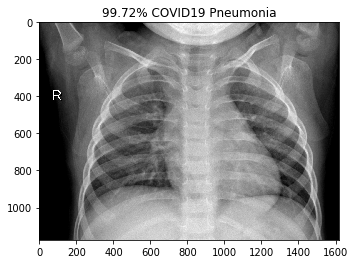

normal\NORMAL2-IM-1350-0001.jpeg


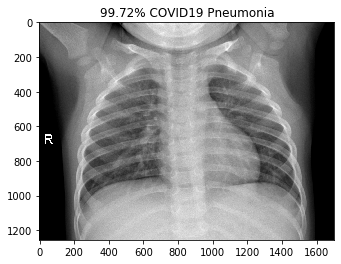

normal\NORMAL2-IM-1351-0001.jpeg


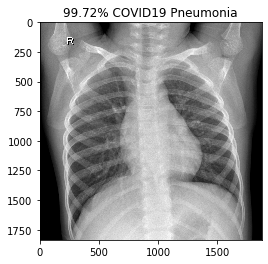

normal\NORMAL2-IM-1356-0001.jpeg


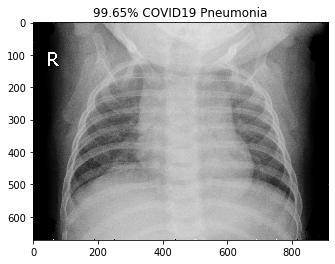

normal\NORMAL2-IM-1357-0001.jpeg


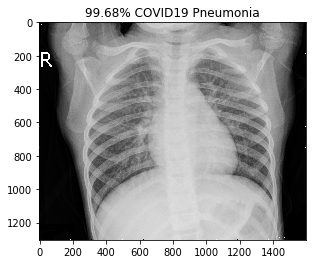

normal\NORMAL2-IM-1360-0001.jpeg


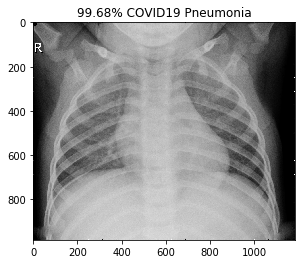

normal\NORMAL2-IM-1362-0001.jpeg


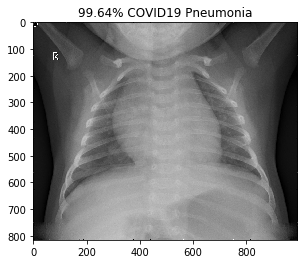

normal\NORMAL2-IM-1365-0001 (2).jpeg


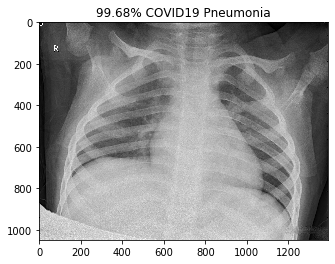

normal\NORMAL2-IM-1365-0001.jpeg


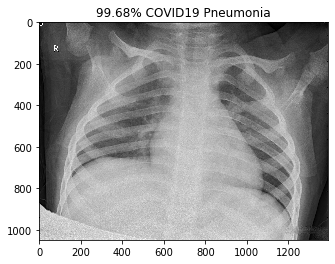

normal\NORMAL2-IM-1371-0001.jpeg


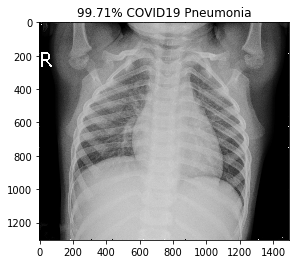

normal\NORMAL2-IM-1376-0001.jpeg


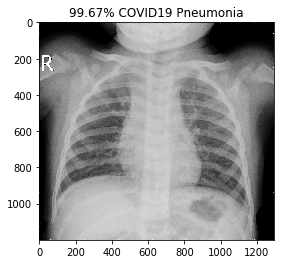

normal\NORMAL2-IM-1379-0001.jpeg


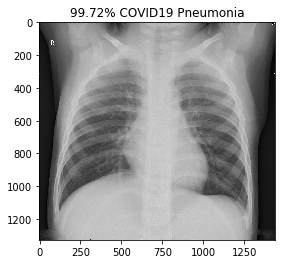

normal\NORMAL2-IM-1385-0001.jpeg


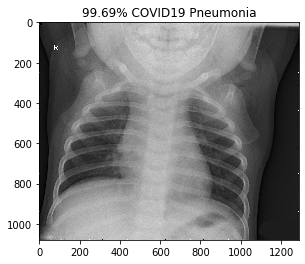

normal\NORMAL2-IM-1396-0001.jpeg


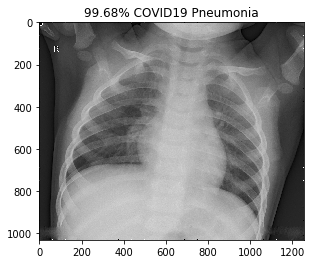

normal\NORMAL2-IM-1400-0001.jpeg


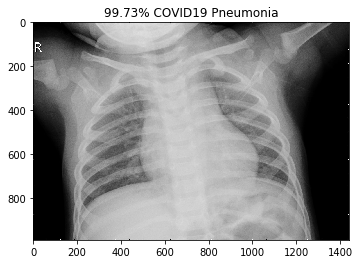

normal\NORMAL2-IM-1401-0001.jpeg


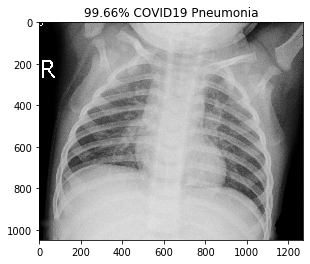

normal\NORMAL2-IM-1406-0001.jpeg


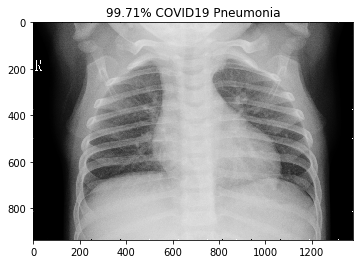

normal\NORMAL2-IM-1412-0001.jpeg


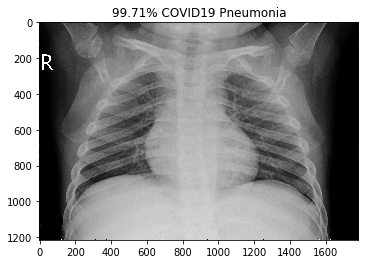

normal\NORMAL2-IM-1419-0001.jpeg


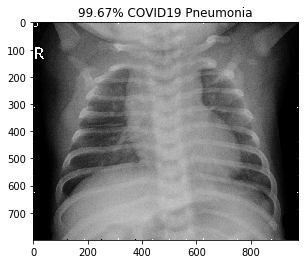

normal\NORMAL2-IM-1422-0001.jpeg


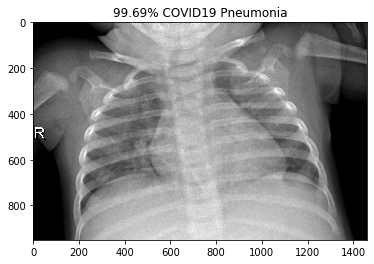

normal\NORMAL2-IM-1423-0001.jpeg


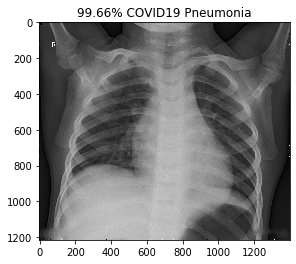

IndexError: list index out of range

In [35]:
import cv2


import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_dir + "/" + eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()